In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Default style parameters (feel free to modify as you see fit)
params = {'legend.fontsize': 'large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'xtick.direction':'in',
         'ytick.direction':'in',
         }
plt.rcParams.update(params)

# 数値積分

区間 $[a,b]$ で、ある関数を積分するという問題を考えよう：
$$
I = \int_{a}^b f(x) \, dx
$$

以下の場合には、数値積分が必要となる：
- $f(x)$ の陽な表式がなく、ある特定の点 $x$ でのみ値がわかっている場合
- $f(x)$ を知っていても、$f(x)$ の原始関数を知らない場合
など。。

主に2つの数値積分手法がある:
- 区間 $[a,b]$ で積分を直接見積もる
- 積分区間を分割する合成法 (composite methods)

人口に膾炙している方法としては以下が挙げられる：

- 中点則、台形則、シンプソン則
- 求積法 (Newton-Cotes, Gauss-Legendre)

適応求積法: 積分範囲を区分的に分割することによって誤差を制御する

# 中点公式 (Rectangular rule)

積分を、長方形の面積として近似する:

$$
\int_{a}^b f(x) \, dx \approx (b - a) \, f\left(\frac{a+b}{2}\right)
$$

精度を上げるために、積分範囲を $N$ 個に分割する。各区分は $h = (b-a)/N$ の幅を持ち、それぞれに中点則を適用：
$$
\int_a^b f(x) \approx h \sum_{k=1}^N f(x_k), \qquad k = 1,\ldots, N
$$
ただし、
$$
x_k = a + \frac{2k-1}{2} h~.
$$

In [1]:
# 関数 f(x) の n 分割された区間 [a,b] での数値積分の中点公式
def rectangle_rule(f, a, b, n):
    h = (b - a) / n
    ret = 0.0
    xk = a + h / 2.
    for k in range(n):
        ret += f(xk) * h
        xk += h
    return ret

In [2]:
# プロット
def rectangle_rule_plot(f, a, b, n, numpoints = 100):
    xplot = np.linspace(0,2,numpoints)
    yplot = f(xplot)

    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.xlim(0,2)
    plt.axhline(y = 0., color = 'black', linestyle = '--')
    plt.plot(xplot,yplot, color = 'red',label='f(x)')
    
    labelrec = "rectangle rule, (N = " + str(n) + ")"
    
    xks = []
    fks = []
    h = (b - a) / n
    xk = a + h / 2.
    for k in range(1,n+1):
        fval = f(xk)
        if (k == 1):
            plt.plot([xk - h/2., xk - h/2., xk + h/2., xk + h/2.,xk - h/2.], [0.,fval,fval,0.,0.], 
                     color = 'blue', label=labelrec)
        else:
            plt.plot([xk - h/2., xk - h/2., xk + h/2., xk + h/2.,xk - h/2.], [0.,fval,fval,0.,0.], 
                     color = 'blue')
        
        xks.append(xk)
        fks.append(fval)
        
        xk += h
    
    plt.plot(xks,fks,'.', color = 'blue')
    plt.legend()
    
    return plt

次の関数を考える： $f(x) = x^4 - 2x + 2$
この関数を $[0,2]$ で積分:
$$
\int_0^2 ( x^4 - 2x + 2) dx = \left. \frac{x^5}{5} - x^2 + 2x \right|_0^2 = 6.4
$$

In [3]:
flabel = 'x^4 - 2x + 2'
def f(x):
    return x**4 - 2*x + 2
flimit_a = 0.
flimit_b = 2.

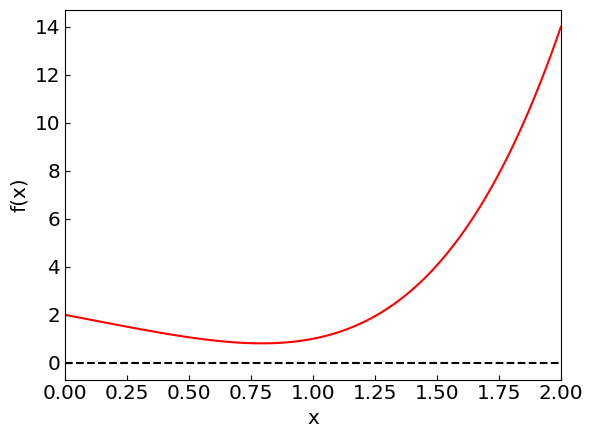

In [ ]:
numpoints = 100
xplot = np.linspace(0,2,numpoints)

yplot = f(xplot)

plt.xlabel("x")
plt.ylabel("f(x)")
plt.xlim(0,2)
plt.axhline(y = 0., color = 'black', linestyle = '--')
plt.plot(xplot,yplot, color = 'red')
plt.show()

数値積分の区分数 N による値の変化

関数 x^4 - 2x + 2 を区間 [ 0.0 , 2.0 ] で中点則を使って積分する
N = 1 , I =  2.0
N = 2 , I =  5.125
N = 3 , I =  5.818930041152262
N = 4 , I =  6.0703125
N = 5 , I =  6.188159999999999
N = 6 , I =  6.252572016460903
N = 7 , I =  6.291545189504369
N = 8 , I =  6.31689453125
N = 9 , I =  6.334298633338417
N = 10 , I =  6.346759999999996
N = 11 , I =  6.355986612936278
N = 12 , I =  6.363007973251031
N = 13 , I =  6.368474493190009
N = 14 , I =  6.37281341107871
N = 15 , I =  6.376314732510287
N = 16 , I =  6.379180908203125
N = 17 , I =  6.381556734234506
N = 18 , I =  6.383547985571311
N = 19 , I =  6.385233385256395
N = 20 , I =  6.386672500000006
N = 21 , I =  6.387911072718333
N = 22 , I =  6.388984700498595
N = 23 , I =  6.3899214196633
N = 24 , I =  6.3907435538837385
N = 25 , I =  6.391469056000005
N = 26 , I =  6.392112496061053
N = 27 , I =  6.392685798298071
N = 28 , I =  6.393198797376085
N = 29 , I =  6.393659662849694
N = 30 , I =  6.394075226337445


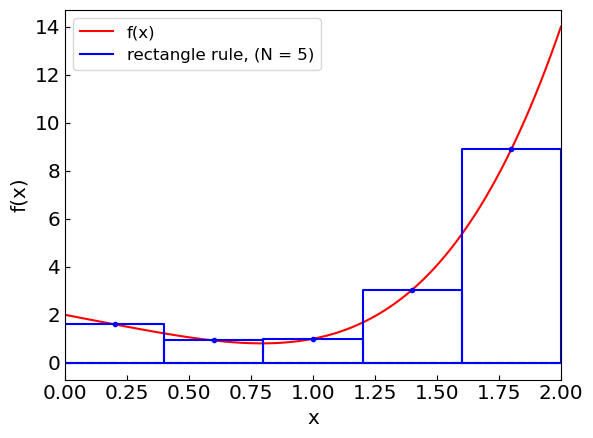

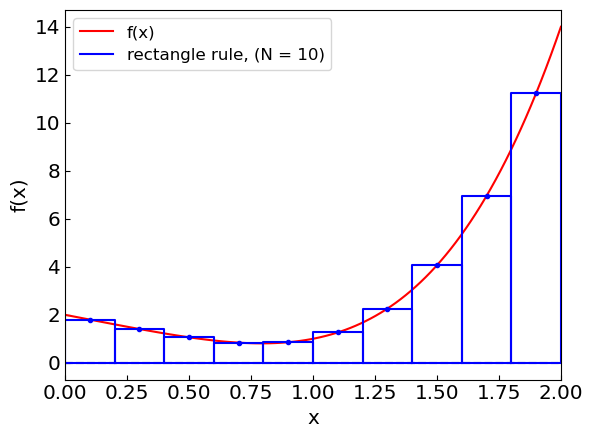

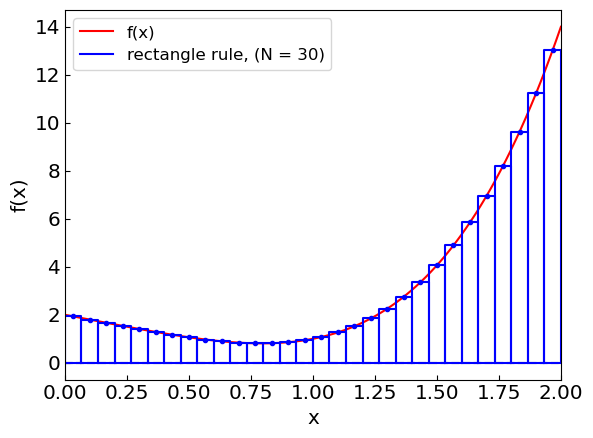

In [5]:
a = flimit_a
b = flimit_b
print("関数",flabel, "を区間 [",a,",",b,"] で中点則を使って積分する")
for n in range(1,31):
    print("N =",n,", I = ",rectangle_rule(f,a,b,n))
    
rectangle_rule_plot(f,a,b,5).show()
rectangle_rule_plot(f,a,b,10).show()
rectangle_rule_plot(f,a,b,30).show()

In [7]:
# アニメーション

import os
import matplotlib.animation as animation
import imageio.v2 as imageio

def integrate_animate(f, flabel, a, b, rule, rule_plot, filename = 'rectangle.gif', nstart = 1, iterations = 8):
    labelgif = filename

    filenames = []
    n = nstart
    for ind in range(1,iterations):
        # create file name and append it to a list
        filename = f'{ind}.png'
        filenames.append(filename)

        plot = rule_plot(f,a,b,n)
        val = rule(f,a,b,n)
        plot.title('I = ' + str(val))
        plot.savefig(filename)
        plot.close()

        n *= 2

    # gif をビルド
    with imageio.get_writer(labelgif, mode='I', loop=0, duration=2000) as writer:
        for filename in filenames:
            image = imageio.imread(filename)
            writer.append_data(image)

    # ファイルを除く
    for filename in set(filenames):
        os.remove(filename)

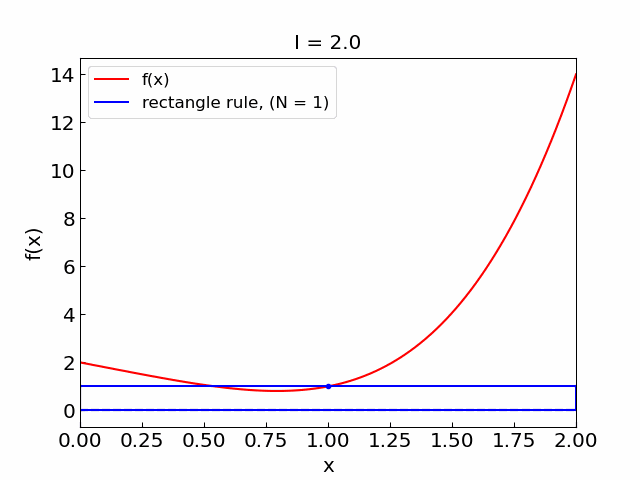

In [8]:
integrate_animate(f,flabel,flimit_a,flimit_b,rectangle_rule,rectangle_rule_plot,'rectangle_rule.gif', 1, 8)

from IPython.display import display, Image, clear_output
display(Image(filename='rectangle_rule.gif'))

中点則の誤差はテイラー展開によって、$(b-a)$ の最低次の項までについて、以下のように見積もられる:
$$
\int_a^b f(x) dx -  (b - a) \, f\left(\frac{a+b}{2}\right) \approx \frac{(b-a)^3}{24} f''(a)
$$


合成中点則については、各区間 $h = (b-a) / N$ についての誤差を足しあげる必要がある：
$$
I - I_{\rm rect} = (b-a) \frac{h^2}{24} \, f''(a) + \mathcal{O}(h^4).
$$

中点則は線形関数 (2階以上の微分について$f'' = 0$となるもの) については厳密。

N = 1 , I =  10.0
N = 2 , I =  10.0
N = 3 , I =  9.999999999999998
N = 4 , I =  10.0
N = 5 , I =  10.0


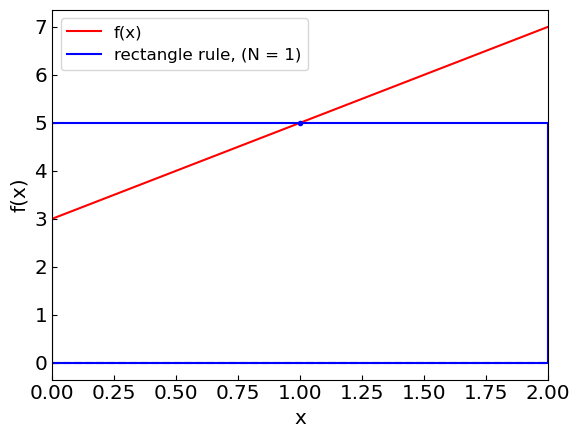

In [9]:
flabellinear = 'f(x) = 2*x + 3'
def flinear(x):
    return 2. * x + 3.

a = 0.
b = 2.
for n in range(1,6):
    print("N =",n,", I = ",rectangle_rule(flinear,a,b,n))
    
rectangle_rule_plot(flinear,a,b,1).show()

# 台形則 (Trapezoidal rule)

積分を、台形の面積で近似。
各区間の端点を線分で結ぶことで近似される：
$$
\int_{a}^b f(x) \, dx \approx (b-a) \, \frac{f(a) + f(b)}{2}~.
$$

中点則と同じく、精度を上げるためには積分区間を $N$ 分割し、幅 $h = (b-a)/N$ の各区間について台形則を適用：
$$
\int_a^b f(x) \approx h \sum_{k=0}^N \frac{f(x_k) + f(x_{k+1})}{2}, \qquad i = 0,\ldots, N
$$
ただし
$$
x_k = a +  k h~.
$$

In [11]:
# 台形則
def trapezoidal_rule(f, a, b, n):
    h = (b - a) / n
    ret = 0.0
    xk = a
    fk = f(xk)
    for k in range(n):
        xk += h
        fk1 = f(xk)
        ret += h * (fk + fk1) / 2.
        fk = fk1
    return ret

In [14]:
# プロット
def trapezoidal_rule_plot(f, a, b, n, numpoints = 100):
    xplot = np.linspace(0,2,numpoints)
    yplot = f(xplot)

    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.xlim(0,2)
    plt.axhline(y = 0., color = 'black', linestyle = '--')
    plt.plot(xplot,yplot, color = 'red',label='f(x)')
    
    labelrec = "trapezoidal rule, (N = " + str(n) + ")"
    
    xks = []
    fks = []
    h = (b - a) / n
    xk = a
    fk = f(xk)
    for k in range(1,n+1):
        xk += h
        fk1 = f(xk)
        if (k == 1):
            plt.plot([xk - h, xk - h, xk, xk,xk - h], [0.,fk,fk1,0.,0.], 
                     color = 'blue', label=labelrec)
        else:
            plt.plot([xk - h, xk - h, xk, xk,xk - h], [0.,fk,fk1,0.,0.], 
                     color = 'blue')
                    
        xks.append(xk)
        fks.append(fk1)
        
        fk = fk1
    
    plt.plot(xks,fks,'.', color = 'blue')
    plt.legend()
    
    return plt

関数 x^4 - 2x + 2 の区間 [ 0.0 , 2.0 ] での台形則による数値積分
N = 1 , I =  16.0
N = 2 , I =  9.0
N = 3 , I =  7.572016460905349
N = 4 , I =  7.0625
N = 5 , I =  6.824960000000001
N = 6 , I =  6.695473251028805
N = 7 , I =  6.61724281549354
N = 8 , I =  6.56640625
N = 9 , I =  6.531524665955397
N = 10 , I =  6.506559999999999
N = 11 , I =  6.488081415203885
N = 12 , I =  6.474022633744856
N = 13 , I =  6.463079023843701
N = 14 , I =  6.454394002498951
N = 15 , I =  6.447386337448559
N = 16 , I =  6.441650390625
N = 17 , I =  6.4368961099603705
N = 18 , I =  6.432911649646909
N = 19 , I =  6.429539368175497
N = 20 , I =  6.426660000000005
N = 21 , I =  6.424181968075723
N = 22 , I =  6.422034014070073
N = 23 , I =  6.420160019439603
N = 24 , I =  6.418515303497934
N = 25 , I =  6.417063936000004
N = 26 , I =  6.41577675851685
N = 27 , I =  6.4146299087449545
N = 28 , I =  6.41360370678883
N = 29 , I =  6.412681805392758
N = 30 , I =  6.411850534979421


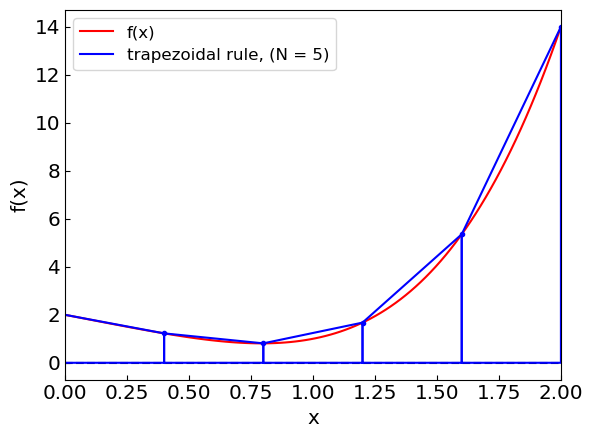

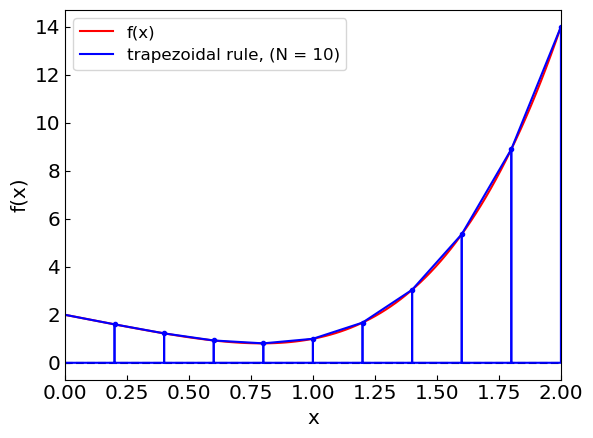

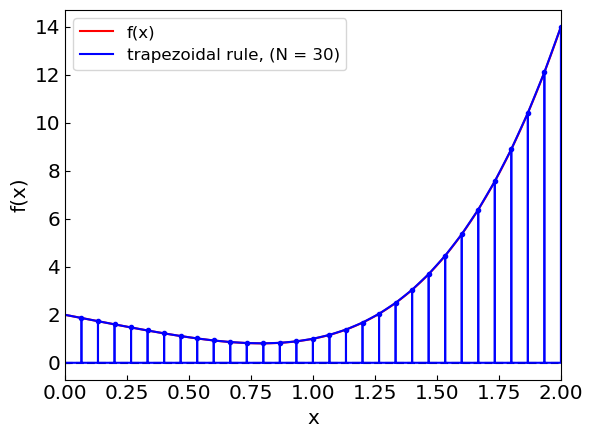

In [15]:
a = flimit_a
b = flimit_b
print("関数",flabel, "の区間 [",a,",",b,"] での台形則による数値積分")
for n in range(1,31):
    print("N =",n,", I = ",trapezoidal_rule(f,a,b,n))
    
trapezoidal_rule_plot(f,a,b,5).show()
trapezoidal_rule_plot(f,a,b,10).show()
trapezoidal_rule_plot(f,a,b,30).show()

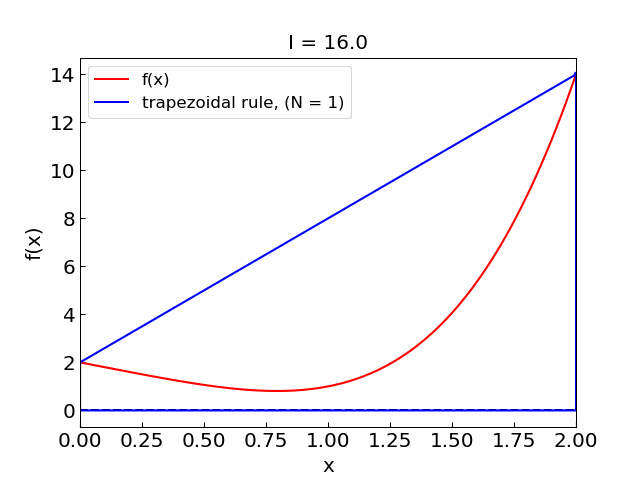

In [29]:
integrate_animate(f,flabel,flimit_a,flimit_b,trapezoidal_rule,trapezoidal_rule_plot,'trapezoidal_rule.gif', 1, 8)

from IPython.display import display, Image, clear_output
display(Image(filename='trapezoidal_rule.gif'))

台形則の誤差は、$(b-a)$ の最低次で
$$
I - I_{\rm trap} = \int_a^b f(x) dx ~~ - ~~ (b-a) \, \frac{f(a) + f(b)}{2} \approx -\frac{(b-a)^3}{12} f''(a)\,.
$$


合成台形則 (composite trapezoidal rule) は、
$$
I - I_{\rm trap} = -(b-a) \frac{h^2}{12} \, f''(a) + \mathcal{O}(h^4).
$$

中点則同様に、台形則は線形関数について厳密。

N = 1 , I =  10.0
N = 2 , I =  10.0
N = 3 , I =  9.999999999999998
N = 4 , I =  10.0
N = 5 , I =  10.0


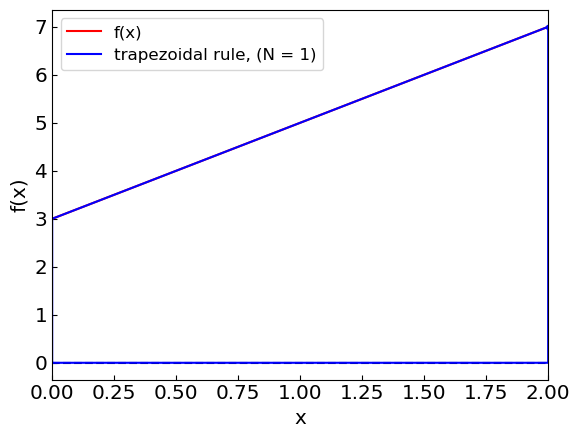

In [16]:
flabellinear = 'f(x) = 2*x + 3'
def flinear(x):
    return 2. * x + 3.

a = 0.
b = 2.
for n in range(1,6):
    print("N =",n,", I = ",trapezoidal_rule(flinear,a,b,n))
    
trapezoidal_rule_plot(flinear,a,b,1).show()

# シンプソン則 (Simpson's rule)

中点則による積分 $I_{\rm rect}$ と台形則による積分 $I_{\rm trap}$ の真値からの誤差は、それぞれ
$$
I - I_{\rm rect} = \frac{(b-a)^3}{24} f''(a) + \mathcal{O}(h^4)
$$
と
$$
I - I_{\rm trap} = -\frac{(b-a)^3}{12} f''(a) + \mathcal{O}(h^4).
$$
である。

シンプソン則は中点則と台形則の組み合わせである：

$$
I_S = \frac{2I_{\rm rect} + I_{\rm trap}}{3}.
$$

この組み合わせは、 $O[(b-a)^3]$ の誤差の項が消えるように取られている。
シンプソン則は、被積分関数を端点と中点を2次の多項式で内挿することでも導出できる。

シンプソン則は、
$$
\int_{a}^b f(x) \, dx \approx \frac{(b-a)}{6} \, \left[f(a) + 4 f \left( \frac{a+b}{2} \right) + f(b)\right].
$$

今まで同様、合成シンプソン則 (Composite Simpson's rule) では、各区間の幅 $h = (b-a)/N$ として、
$$
\int_a^b f(x) \approx \frac{h}{3} \left[f(x_0) + 4 \sum_{k=1}^{N/2} f(x_{2k-1}) + 2 \sum_{k=1}^{N/2-1} f(x_{2k}) + f(x_N) \right] , \qquad i = 0,\ldots, N
$$
ただし
$$
x_k = a +  k h~.
$$

In [17]:
# シンプソン則
def simpson_rule(f, a, b, n):
    if n % 2 == 1:
        raise ValueError("Number of subintervals must be even for Simpson's rule.")

    h = (b - a) / n
    ret = f(a) + f(b)
    for k in range(1, n, 2):
        xk = a + k * h 
        ret += 4 * f(xk)
    for k in range(2, n-1, 2):
        xk = a + k * h
        ret += 2 * f(xk)
    ret *= h / 3.0
    return ret

In [18]:
# プロット
def simpson_rule_plot(f, a, b, n, numpoints = 100):
    tn = n
    if (tn == 1):
        tn = 2
    if tn % 2 == 1:
        raise ValueError("Number of subintervals must be even for Simpson's rule.")
    
    xplot = np.linspace(0,2,numpoints)
    yplot = f(xplot)

    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.xlim(0,2)
    plt.axhline(y = 0., color = 'black', linestyle = '--')
    plt.plot(xplot,yplot, color = 'red',label='f(x)')
    
    def PolySimpson(x,a,b,m,fa,fb,fm):
        ret = 0.
        ret += fa * (x - m) * (x - b) / (a - m) / (a - b)
        ret += fm * (x - a) * (x - b) / (m - a) / (m - b)
        ret += fb * (x - a) * (x - m) / (b - a) / (b - m)
        return ret
    
    labelrec = "Simpson's rule, (N = " + str(n) + ")"
    
    xks = []
    fks = []
    h = (b - a) / tn
    for k in range(1,tn,2):
        x1 = a + h * (k-1)
        x2 = a + h * k
        x3 = a + h * (k+1)
        f1 = f(x1)
        f2 = f(x2)
        f3 = f(x3)
        
        xks.append([x1,x2,x3])
        fks.append([f1,f2,f3])
        
        numpointssubplot = 50
        xsubplot = np.linspace(x1,x3,numpointssubplot)
        ysubplot = PolySimpson(xsubplot, x1, x3, x2, f1, f3, f2)
        
        if (k == 1):
            plt.plot(xsubplot, ysubplot, 
                     color = 'blue', label=labelrec)
        else:
            plt.plot(xsubplot, ysubplot, 
                     color = 'blue')
    
    plt.plot(xks,fks,'.', color = 'blue')
    plt.legend()
    
    return plt

関数 x^4 - 2x + 2 の区間 [ 0.0 , 2.0 ] でのシンプソン積分
N = 2 , I =  6.666666666666666
N = 4 , I =  6.416666666666666
N = 6 , I =  6.403292181069957
N = 8 , I =  6.401041666666666
N = 10 , I =  6.400426666666667
N = 12 , I =  6.4002057613168715
N = 14 , I =  6.400111064834095


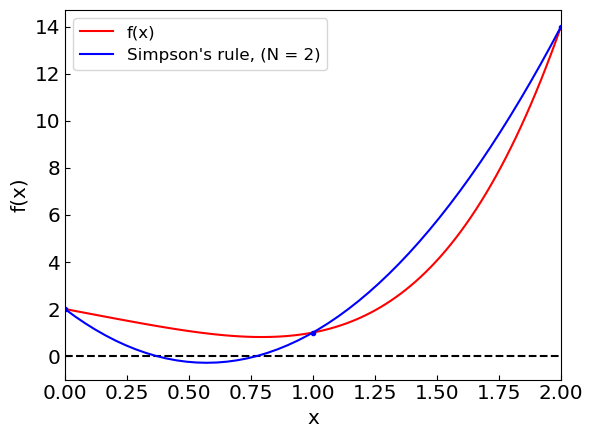

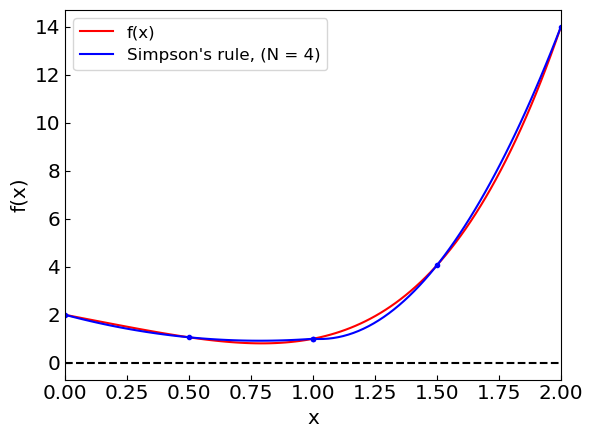

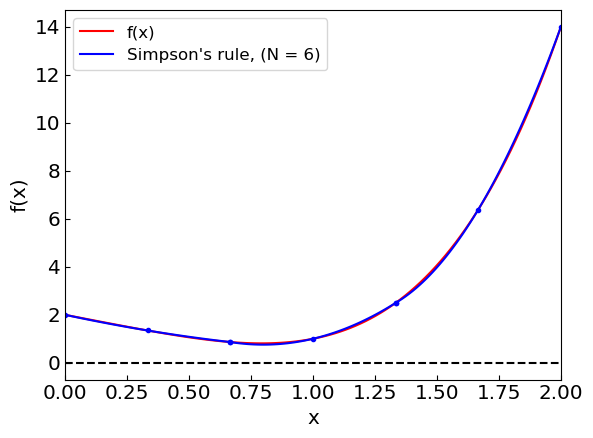

In [19]:
a = 0.
b = 2.
print("関数",flabel, "の区間 [",a,",",b,"] でのシンプソン積分")
for n in range(2,15,2):
    print("N =",n,", I = ",simpson_rule(f,a,b,n))
    
simpson_rule_plot(f,a,b,2).show()
simpson_rule_plot(f,a,b,4).show()
simpson_rule_plot(f,a,b,6).show()

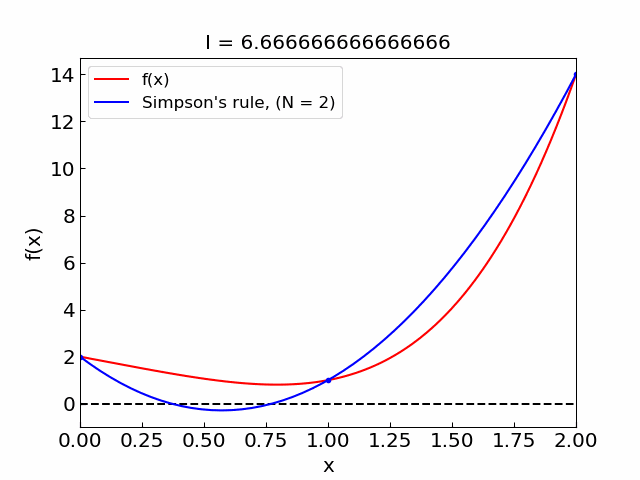

In [20]:
integrate_animate(f,flabel,flimit_a,flimit_b,simpson_rule,simpson_rule_plot,'simpson_rule.gif', 2, 8)

from IPython.display import display, Image, clear_output
display(Image(filename='simpson_rule.gif'))

In [32]:
a = flimit_a
b = flimit_b
print("関数",flabel, "の区間 [",a,",",b,"] での数値積分")
print("{0:>5} {1:>12} {2:>18} {3:>18}".format("N", "中点則", "台形則", "シンプソン則"))
for n in range(2,21,2):
    print("{0:5} {1:20.15f} {2:20.15f} {3:20.15f}".format(n, rectangle_rule(f,a,b,n), 
                                                          trapezoidal_rule(f,a,b,n), 
                                                          simpson_rule(f,a,b,n)))

関数 x^4 - 2x + 2 の区間 [ 0.0 , 2.0 ] での数値積分
    N          中点則                台形則             シンプソン則
    2    5.125000000000000    9.000000000000000    6.666666666666666
    4    6.070312500000000    7.062500000000000    6.416666666666666
    6    6.252572016460903    6.695473251028805    6.403292181069957
    8    6.316894531250000    6.566406250000000    6.401041666666666
   10    6.346759999999996    6.506559999999999    6.400426666666667
   12    6.363007973251031    6.474022633744856    6.400205761316871
   14    6.372813411078710    6.454394002498951    6.400111064834095
   16    6.379180908203125    6.441650390625000    6.400065104166666
   18    6.383547985571311    6.432911649646909    6.400040644210740
   20    6.386672500000006    6.426660000000005    6.400026666666668


シンプソン則の誤差は $h^4$ のオーダーである：
$$
I - I_S = C \, h^4 + \mathcal{O}(h^6)
$$

シンプソン則は、3次までの多項式については厳密。

シンプソン則:
N = 2 , I =  16.0
N = 4 , I =  16.0
N = 6 , I =  16.0
N = 8 , I =  16.0
N = 10 , I =  16.0


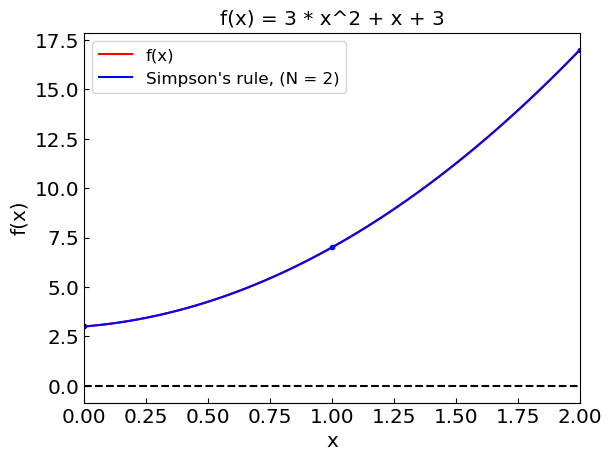


台形則:
N = 2 , I =  17.0
N = 4 , I =  16.25
N = 6 , I =  16.111111111111107
N = 8 , I =  16.0625
N = 10 , I =  16.04


In [33]:
flabelquad = 'f(x) = 3 * x^2 + x + 3'
def fquad(x):
    return 3. * x**2 + x + 3.

a = 0.
b = 2.
print("シンプソン則:")
for n in range(2,11,2):
    print("N =",n,", I = ",simpson_rule(fquad,a,b,n))
    
tplot =  simpson_rule_plot(fquad,a,b,2)
tplot.title(flabelquad)
tplot.show()

print('')

print("台形則:")
for n in range(2,11,2):
    print("N =",n,", I = ",trapezoidal_rule(fquad,a,b,n))

シンプソン則:
N = 2 , I =  8.0
N = 4 , I =  8.0
N = 6 , I =  7.999999999999998
N = 8 , I =  8.0
N = 10 , I =  8.0


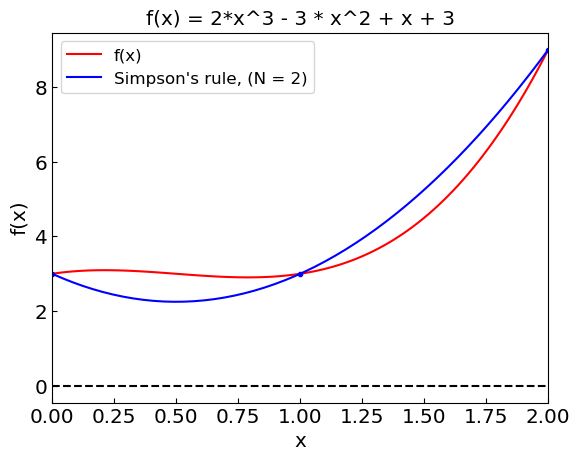


台形則:
N = 2 , I =  9.0
N = 4 , I =  8.25
N = 6 , I =  8.111111111111109
N = 8 , I =  8.0625
N = 10 , I =  8.04


In [34]:
flabelcubic = 'f(x) = 2*x^3 - 3 * x^2 + x + 3'
def fcubic(x):
    return 2. * x**3 - 3. * x**2 + x + 3.

a = 0.
b = 2.
print("シンプソン則:")
for n in range(2,11,2):
    print("N =",n,", I = ",simpson_rule(fcubic,a,b,n))
    
tplot =  simpson_rule_plot(fcubic,a,b,2)
tplot.title(flabelcubic)
tplot.show()

print('')

print("台形則:")
for n in range(2,11,2):
    print("N =",n,", I = ",trapezoidal_rule(fcubic,a,b,n))

# 適応求積法 (Adaptive quadrature)

数値積分の誤差を制御したい。

中点則と台形則については、すでに誤差が区間の幅 $h$ について $\varepsilon = c h^2$ とスケールすることをみた.

今、積分区間の分割数を2倍にしてみよう。ここで $h_2 = h_1 / 2$ とする.
このとき、誤差は分割後と前でそれぞれ $\varepsilon_2 = I - I_2 = c h_2^2$, と $\varepsilon_1 = I - I_1 = 4 c h_2^2$　となる。
したがって、$c h_2^2$ と $ch_1^2$ をそれぞれ消去すると、$\varepsilon_2 \simeq (I_2 - I_1) / 3$ となる.

より一般に、
$$
\varepsilon_k \simeq (I_k - I_{k-1}) / 3.
$$

所望の精度に達するまで、分割数を倍にし続ければ良い。

In [35]:
# 適応求積法と中点則による数値積分
def rectangle_rule_adaptive(f, a, b, nst = 1, tol = 1.e-8, max_iterations = 16):
    Iprev = 0.
    n = nst
    Iprev = rectangle_rule(f, a, b, n)
    print("Iteration: {0:5}, I = {1:20.15f}".format(1, Iprev))
    for k in range(1, max_iterations):
        n *= 2
        Inew = rectangle_rule(f, a, b, n)
        ek = (Inew - Iprev) / 3.
        print("Iteration: {0:5}, I = {1:20.15f}, error estimate = {2:10.15f}".format(k+1, Inew, ek))
        if (abs(ek) < tol):
            return Inew
        Iprev = Inew
        
    print("Failed to achieve the desired accuracy after", max_iterations,"iterations")
    return Inew

In [36]:
a = flimit_a
b = flimit_b
print("Computing the integral of",flabel, "over the interval (",a,",",b,") using adaptive rectangle rule")
rectangle_rule_adaptive(f,a,b)

Computing the integral of x^4 - 2x + 2 over the interval ( 0.0 , 2.0 ) using adaptive rectangle rule
Iteration:     1, I =    2.000000000000000
Iteration:     2, I =    5.125000000000000, error estimate = 1.041666666666667
Iteration:     3, I =    6.070312500000000, error estimate = 0.315104166666667
Iteration:     4, I =    6.316894531250000, error estimate = 0.082194010416667
Iteration:     5, I =    6.379180908203125, error estimate = 0.020762125651042
Iteration:     6, I =    6.394792556762695, error estimate = 0.005203882853190
Iteration:     7, I =    6.398697972297668, error estimate = 0.001301805178324
Iteration:     8, I =    6.399674482643604, error estimate = 0.000325503448645
Iteration:     9, I =    6.399918620008975, error estimate = 0.000081379121790
Iteration:    10, I =    6.399979654961498, error estimate = 0.000020344984174
Iteration:    11, I =    6.399994913737828, error estimate = 0.000005086258777
Iteration:    12, I =    6.399998728434201, error estimate = 0.000

6.399999995032923

In [37]:
# 適応求積法と台形則による数値積分
def trapezoidal_rule_adaptive(f, a, b, nst = 1, tol = 1.e-8, max_iterations = 16):
    Iprev = 0.
    n = nst
    Iprev = trapezoidal_rule(f, a, b, n)
    print("Iteration: {0:5}, I = {1:20.15f}".format(1, Iprev))
    for k in range(1, max_iterations):
        n *= 2
        Inew = trapezoidal_rule(f, a, b, n)
        ek = (Inew - Iprev) / 3.
        print("Iteration: {0:5}, I = {1:20.15f}, error estimate = {2:10.15f}".format(k+1, Inew, ek))
        if (abs(ek) < tol):
            return Inew
        Iprev = Inew
        
    print("Failed to achieve the desired accuracy after", max_iterations,"iterations")
    return Inew

In [38]:
a = flimit_a
b = flimit_b
print("関数",flabel, "の区間 [",a,",",b,"] での adaptive trapezoidal rule による数値積分")
trapezoidal_rule_adaptive(f,a,b)

関数 x^4 - 2x + 2 の区間 [ 0.0 , 2.0 ] での adaptive trapezoidal rule による数値積分
Iteration:     1, I =   16.000000000000000
Iteration:     2, I =    9.000000000000000, error estimate = -2.333333333333333
Iteration:     3, I =    7.062500000000000, error estimate = -0.645833333333333
Iteration:     4, I =    6.566406250000000, error estimate = -0.165364583333333
Iteration:     5, I =    6.441650390625000, error estimate = -0.041585286458333
Iteration:     6, I =    6.410415649414062, error estimate = -0.010411580403646
Iteration:     7, I =    6.402604103088379, error estimate = -0.002603848775228
Iteration:     8, I =    6.400651037693024, error estimate = -0.000651021798452
Iteration:     9, I =    6.400162760168314, error estimate = -0.000162759174903
Iteration:    10, I =    6.400040690088645, error estimate = -0.000040690026556
Iteration:    11, I =    6.400010172525072, error estimate = -0.000010172521191
Iteration:    12, I =    6.400002543131352, error estimate = -0.000002543131240
Iterat

6.400000009934106

In [39]:
# 適応求積法とシンプソン則による数値積分
def simpson_rule_adaptive(f, a, b, nst = 2, tol = 1.e-8, max_iterations = 16):
    Iprev = 0.
    n = nst
    Iprev = simpson_rule(f, a, b, n)
    print("Iteration: {0:5}, I = {1:20.15f}".format(1, Iprev))
    for k in range(1, max_iterations):
        n *= 2
        Inew = simpson_rule(f, a, b, n)
        ek = (Inew - Iprev) / 15.
        
        print("Iteration: {0:5}, I = {1:20.15f}, error estimate = {2:10.15f}".format(k+1, Inew, ek))
        if (abs(ek) < tol):
            return Inew
        Iprev = Inew
        
    print("Failed to achieve the desired accuracy after", max_iterations,"iterations")
    return Inew

In [41]:
a = flimit_a
b = flimit_b
print("関数",flabel, "の区間 [",a,",",b,"] での adaptive Simpson's rule による数値積分")
simpson_rule_adaptive(f,a,b,2)

関数 x^4 - 2x + 2 の区間 [ 0.0 , 2.0 ] での adaptive Simpson's rule による数値積分
Iteration:     1, I =    6.666666666666666
Iteration:     2, I =    6.416666666666666, error estimate = -0.016666666666667
Iteration:     3, I =    6.401041666666666, error estimate = -0.001041666666667
Iteration:     4, I =    6.400065104166666, error estimate = -0.000065104166667
Iteration:     5, I =    6.400004069010416, error estimate = -0.000004069010417
Iteration:     6, I =    6.400000254313150, error estimate = -0.000000254313151
Iteration:     7, I =    6.400000015894571, error estimate = -0.000000015894572
Iteration:     8, I =    6.400000000993410, error estimate = -0.000000000993411


6.40000000099341

In [42]:
rungelabel = "Runge function"
def runge(x):
    return 1./(25*x**2 + 1.)

In [43]:
a = -2.
b = 2.
print("関数",rungelabel, "の区間 [",a,",",b,"] での adaptive trapezoidal rule による数値積分")
trapezoidal_rule_adaptive(runge,a,b,4,1.e-10)

関数 Runge function の区間 [ -2.0 , 2.0 ] での adaptive trapezoidal rule による数値積分
Iteration:     1, I =    1.086824067022087
Iteration:     2, I =    0.698810316902099, error estimate = -0.129337916706663
Iteration:     3, I =    0.596649043819530, error estimate = -0.034053757694190
Iteration:     4, I =    0.588479663841841, error estimate = -0.002723126659230
Iteration:     5, I =    0.588444691123849, error estimate = -0.000011657572664
Iteration:     6, I =    0.588449474263155, error estimate = 0.000001594379768
Iteration:     7, I =    0.588450670842736, error estimate = 0.000000398859860
Iteration:     8, I =    0.588450970000918, error estimate = 0.000000099719394
Iteration:     9, I =    0.588451044791294, error estimate = 0.000000024930125
Iteration:    10, I =    0.588451063488940, error estimate = 0.000000006232549
Iteration:    11, I =    0.588451068163354, error estimate = 0.000000001558138
Iteration:    12, I =    0.588451069331961, error estimate = 0.000000000389535
Iteration:

0.588451069624111

In [44]:
a = -2.
b = 2.
print("関数",rungelabel, "の区間 [",a,",",b,"] での adaptive trapezoidal rule による数値積分")
simpson_rule_adaptive(runge,a,b,4,1.e-10)

関数 Runge function の区間 [ -2.0 , 2.0 ] での adaptive trapezoidal rule による数値積分
Iteration:     1, I =    0.775831429296776
Iteration:     2, I =    0.569472400195436, error estimate = -0.013757268606756
Iteration:     3, I =    0.562595286125340, error estimate = -0.000458474271340
Iteration:     4, I =    0.585756537182612, error estimate = 0.001544083403818
Iteration:     5, I =    0.588433033551185, error estimate = 0.000178433091238
Iteration:     6, I =    0.588451068642924, error estimate = 0.000001202339449
Iteration:     7, I =    0.588451069702595, error estimate = 0.000000000070645


0.5884510697025954

## 不連続な被積分関数

被積分関数は不連続であっても良い。例えば、次の関数を考える
$$
f(x) = \begin{cases} 
3 x^2 + x + 3 & (x < 1),\\
2 x^3 - 3x^2 + x + 3. & (x > 1),
\end{cases}
$$

積分：

$$
I = \int_0^2 f(x) = 9.5
$$

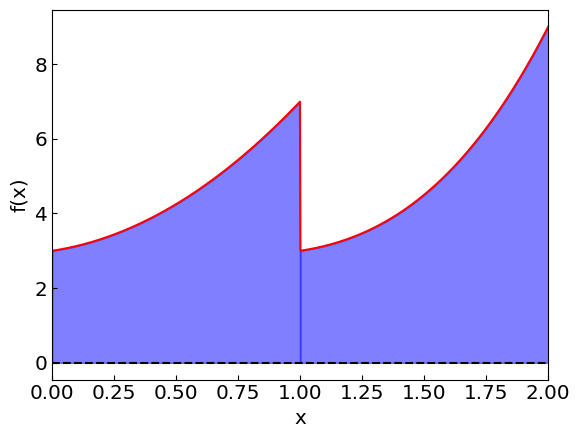

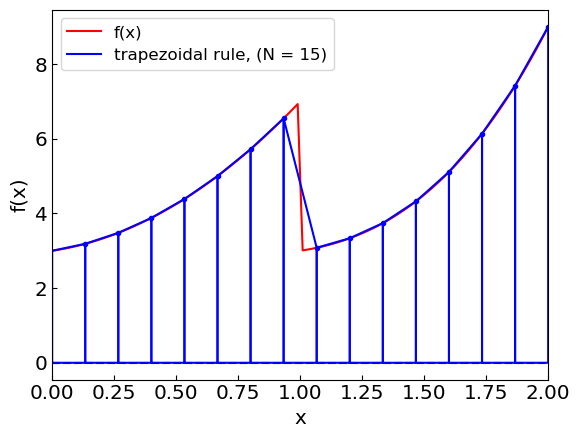

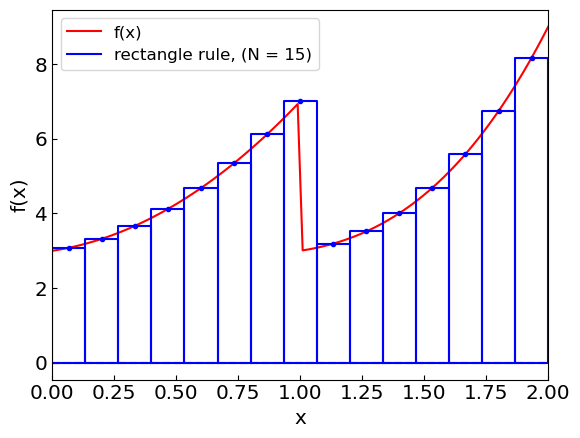

In [45]:
def fdist1(x):
    return 3*x**2 + x + 3

def fdist2(x):
    return 2*x**3 - 3*x**2 + x + 3

# 不連続のプロット
xdistcont = 1.

def fdist(x):
    x = np.asarray(x)  # Ensure x is a numpy array
    result = np.where(x < xdistcont, fdist1(x), fdist2(x))
    return result

xplot = np.linspace(0,2,1000)
yplot = fdist(xplot)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.xlim(0,2)
plt.axhline(y = 0., color = 'black', linestyle = '--')

# 曲線の下を埋める
plt.fill_between(xplot, yplot, where=(xplot < xdistcont), color='blue', alpha=0.5)
plt.fill_between(xplot, yplot, where=(xplot >= xdistcont), color='blue', alpha=0.5)

plt.plot(xplot,yplot, color = 'red')
plt.show()

trapezoidal_rule_plot(fdist,0,2,15).show()
rectangle_rule_plot(fdist,0,2,15).show()

In [46]:
# Adaptive rectangle rule
print("中点則:")
rectangle_rule_adaptive(fdist,0,2,1,1.e-8)

中点則:
Iteration:     1, I =    6.000000000000000
Iteration:     2, I =    8.750000000000000, error estimate = 0.916666666666667
Iteration:     3, I =    9.312500000000000, error estimate = 0.187500000000000
Iteration:     4, I =    9.453125000000000, error estimate = 0.046875000000000
Iteration:     5, I =    9.488281250000000, error estimate = 0.011718750000000
Iteration:     6, I =    9.497070312500000, error estimate = 0.002929687500000
Iteration:     7, I =    9.499267578125000, error estimate = 0.000732421875000
Iteration:     8, I =    9.499816894531250, error estimate = 0.000183105468750
Iteration:     9, I =    9.499954223632812, error estimate = 0.000045776367188
Iteration:    10, I =    9.499988555908203, error estimate = 0.000011444091797
Iteration:    11, I =    9.499997138977051, error estimate = 0.000002861022949
Iteration:    12, I =    9.499999284744263, error estimate = 0.000000715255737
Iteration:    13, I =    9.499999821186066, error estimate = 0.000000178813934
Iter

9.49999999720603

In [47]:
# Adaptive trapezoidal rule
print("台形則:")
trapezoidal_rule_adaptive(fdist,0,2,1,1.e-8)

台形則:
Iteration:     1, I =   12.000000000000000
Iteration:     2, I =    9.000000000000000, error estimate = -1.000000000000000
Iteration:     3, I =    8.875000000000000, error estimate = -0.041666666666667
Iteration:     4, I =    9.093750000000000, error estimate = 0.072916666666667
Iteration:     5, I =    9.273437500000000, error estimate = 0.059895833333333
Iteration:     6, I =    9.380859375000000, error estimate = 0.035807291666667
Iteration:     7, I =    9.438964843750000, error estimate = 0.019368489583333
Iteration:     8, I =    9.469116210937500, error estimate = 0.010050455729167
Iteration:     9, I =    9.484466552734375, error estimate = 0.005116780598958
Iteration:    10, I =    9.492210388183594, error estimate = 0.002581278483073
Iteration:    11, I =    9.496099472045898, error estimate = 0.001296361287435
Iteration:    12, I =    9.498048305511475, error estimate = 0.000649611155192
Iteration:    13, I =    9.499023795127869, error estimate = 0.000325163205465
It

9.499877935275437

In [48]:
# Adaptive Simpson rule
print("シンプソン則:")
simpson_rule_adaptive(fdist,0,2,2,1.e-8)

シンプソン則:
Iteration:     1, I =    8.000000000000000
Iteration:     2, I =    8.833333333333332, error estimate = 0.055555555555555
Iteration:     3, I =    9.166666666666666, error estimate = 0.022222222222222
Iteration:     4, I =    9.333333333333332, error estimate = 0.011111111111111
Iteration:     5, I =    9.416666666666666, error estimate = 0.005555555555556
Iteration:     6, I =    9.458333333333332, error estimate = 0.002777777777778
Iteration:     7, I =    9.479166666666666, error estimate = 0.001388888888889
Iteration:     8, I =    9.489583333333332, error estimate = 0.000694444444444
Iteration:     9, I =    9.494791666666666, error estimate = 0.000347222222222
Iteration:    10, I =    9.497395833333332, error estimate = 0.000173611111111
Iteration:    11, I =    9.498697916666666, error estimate = 0.000086805555556
Iteration:    12, I =    9.499348958333332, error estimate = 0.000043402777778
Iteration:    13, I =    9.499674479166666, error estimate = 0.000021701388889
I

9.49995930989553

うまくいくが、精度はあまり良くない。

積分範囲を分けることで、より良い精度を実現。

$$
I = I_1 + I_2,
$$
ただし、
$$
I_1 = \int_a^{x_{\rm distcont}} f_1(x)
$$
と
$$
I_2 = \int_{x_{\rm distcont}}^b f_2(x)
$$
と定義。

In [49]:
# Adaptive rectangle rule
print("中点則:")
eps = 1.e-8
a = 0
b = xdistcont
I1 = rectangle_rule_adaptive(fdist1,a,b,1,0.5*eps)

a = xdistcont
b = 2
I2 = rectangle_rule_adaptive(fdist2,a,b,1,0.5*eps)

print("I1 =",I1)
print("I2 =",I2)
print("I =",I1 + I2)

中点則:
Iteration:     1, I =    4.250000000000000
Iteration:     2, I =    4.437500000000000, error estimate = 0.062500000000000
Iteration:     3, I =    4.484375000000000, error estimate = 0.015625000000000
Iteration:     4, I =    4.496093750000000, error estimate = 0.003906250000000
Iteration:     5, I =    4.499023437500000, error estimate = 0.000976562500000
Iteration:     6, I =    4.499755859375000, error estimate = 0.000244140625000
Iteration:     7, I =    4.499938964843750, error estimate = 0.000061035156250
Iteration:     8, I =    4.499984741210938, error estimate = 0.000015258789062
Iteration:     9, I =    4.499996185302734, error estimate = 0.000003814697266
Iteration:    10, I =    4.499999046325684, error estimate = 0.000000953674316
Iteration:    11, I =    4.499999761581421, error estimate = 0.000000238418579
Iteration:    12, I =    4.499999940395355, error estimate = 0.000000059604645
Iteration:    13, I =    4.499999985098839, error estimate = 0.000000014901161
Iter

In [50]:
# Adaptive trapezoidal rule
print("台形則:")
eps = 1.e-8
a = 0
b = xdistcont
I1 = trapezoidal_rule_adaptive(fdist1,a,b,1,0.5*eps)

a = xdistcont
b = 2
I2 = trapezoidal_rule_adaptive(fdist2,a,b,1,0.5*eps)

print("I1 =",I1)
print("I2 =",I2)
print("I =",I1 + I2)

台形則:
Iteration:     1, I =    5.000000000000000
Iteration:     2, I =    4.625000000000000, error estimate = -0.125000000000000
Iteration:     3, I =    4.531250000000000, error estimate = -0.031250000000000
Iteration:     4, I =    4.507812500000000, error estimate = -0.007812500000000
Iteration:     5, I =    4.501953125000000, error estimate = -0.001953125000000
Iteration:     6, I =    4.500488281250000, error estimate = -0.000488281250000
Iteration:     7, I =    4.500122070312500, error estimate = -0.000122070312500
Iteration:     8, I =    4.500030517578125, error estimate = -0.000030517578125
Iteration:     9, I =    4.500007629394531, error estimate = -0.000007629394531
Iteration:    10, I =    4.500001907348633, error estimate = -0.000001907348633
Iteration:    11, I =    4.500000476837158, error estimate = -0.000000476837158
Iteration:    12, I =    4.500000119209290, error estimate = -0.000000119209290
Iteration:    13, I =    4.500000029802322, error estimate = -0.00000002

In [51]:
# Adaptive Simpson's rule
print("シンプソン則:")
eps = 1.e-8
a = 0
b = xdistcont
I1 = simpson_rule_adaptive(fdist1,a,b,2,0.5*eps)

a = xdistcont
b = 2
I2 = simpson_rule_adaptive(fdist2,a,b,2,0.5*eps)

print("I1 =",I1)
print("I2 =",I2)
print("I =",I1 + I2)

シンプソン則:
Iteration:     1, I =    4.500000000000000
Iteration:     2, I =    4.500000000000000, error estimate = 0.000000000000000
Iteration:     1, I =    5.000000000000000
Iteration:     2, I =    5.000000000000000, error estimate = 0.000000000000000
I1 = 4.5
I2 = 5.0
I = 9.5


## 広義積分

積分によっては、以下のような特殊な場合がある
- 端点に特異点を含む
- 無限領域での積分

#### 端点での特異点
次の関数を考える：
$$
\int_0^1 \frac{1}{\sqrt{x}} dx = \left. 2\sqrt{x} \right|_0^1 = 2
$$

被積分関数は $x = 0$ で発散。しかし、この特異点は積分可能。

端点の値を使う方法はうまくいかない。

In [52]:
def fsing1(x):
    return 1./np.sqrt(x)

trapezoidal_rule(fsing1,0.,1.,10)

/var/folders/69/9_nc30pj2jn716vdqhl0q97w0000gn/T/ipykernel_81522/847063500.py:2: RuntimeWarning: divide by zero encountered in scalar divide
  return 1./np.sqrt(x)


inf

しかし、中点則はうまくいく

In [57]:
print('中点則による積分 \\int_0^1 1/\\sqrt{x} dx')
nst = 1
rectangle_rule_adaptive(fsing1,0.,1.,1,1.e-3,20)

中点則による積分 \int_0^1 1/\sqrt{x} dx
Iteration:     1, I =    1.414213562373095
Iteration:     2, I =    1.577350269189626, error estimate = 0.054378902272177
Iteration:     3, I =    1.698844079579673, error estimate = 0.040497936796682
Iteration:     4, I =    1.786461001734842, error estimate = 0.029205640718390
Iteration:     5, I =    1.848856684639738, error estimate = 0.020798560968299
Iteration:     6, I =    1.893088359706383, error estimate = 0.014743891688882
Iteration:     7, I =    1.924392755699513, error estimate = 0.010434798664376
Iteration:     8, I =    1.946535279970520, error estimate = 0.007380841423669
Iteration:     9, I =    1.962194152677056, error estimate = 0.005219624235512
Iteration:    10, I =    1.973267083679453, error estimate = 0.003690977000799
Iteration:    11, I =    1.981096937261288, error estimate = 0.002609951193945
Iteration:    12, I =    1.986633507070365, error estimate = 0.001845523269692
Iteration:    13, I =    1.990548459938304, error estima

1.993316751362098

#### 無限領域
次の積分を考える。
$$
\int_a^\infty f(x) dx
$$

この端点に無限を含む積分は変数変換によって積分区間 [0,1] に直すことができる。
例えば、
$$
x = a + \frac{t}{1-t},
$$
のようにとると
$dx = \frac{dt}{1-t^2}$ 
となって、積分は
$$
\int_a^\infty f(x) dx = \int_0^1 f\left(a + \frac{t}{1-t}\right) \frac{dt}{1-t^2} = \int_0^1 g(t) dt
$$

この方法を次の積分に適用しよう：
$$
\int_0^\infty e^{-x} dx = 1
$$

In [58]:
def fexp(x):
    return np.exp(-x)

def g(t, f, a = 0.):
    return f(a + t / (1. - t)) / (1. - t)**2


In [59]:
a = 0.
def frect(x):
    return g(x, fexp, a)

print('変数変換後に中点則を用いて積分 \\int_0^\\infty \\exp(-x) dx')
rectangle_rule_adaptive(frect,0.,1.,1,1.e-6,20)

変数変換後に中点則を用いて積分 \int_0^\infty \exp(-x) dx
Iteration:     1, I =    1.471517764685769
Iteration:     2, I =    1.035213267452946, error estimate = -0.145434832410941
Iteration:     3, I =    0.984670579385046, error estimate = -0.016847562689300
Iteration:     4, I =    1.001784913275257, error estimate = 0.005704777963404
Iteration:     5, I =    1.000155714391028, error estimate = -0.000543066294743
Iteration:     6, I =    1.000040642390661, error estimate = -0.000038357333456
Iteration:     7, I =    1.000010172618432, error estimate = -0.000010156590743
Iteration:     8, I =    1.000002543136036, error estimate = -0.000002543160799
Iteration:     9, I =    1.000000635783161, error estimate = -0.000000635784292


1.0000006357831608

In [60]:
# Try a > 0
a = 3.
def frect(x):
    return g(x, fexp, a)

print('変数変換後に中点則を用いて積分 \\int_',a,'^\\infty \\exp(-x) dx')
# nst = 1
# for n in range(1,6):
#     nst *= 10
#     print("N =",nst,", I = ",rectangle_rule(frect,0.,1.,nst))
rectangle_rule_adaptive(frect,0.,1.,1,1.e-6,20)

print('真値: exp(-a) =', np.exp(-a))

変数変換後に中点則を用いて積分 \int_ 3.0 ^\infty \exp(-x) dx
Iteration:     1, I =    0.073262555554937
Iteration:     2, I =    0.051540233722000, error estimate = -0.007240773944312
Iteration:     3, I =    0.049023861455667, error estimate = -0.000838790755444
Iteration:     4, I =    0.049875933967130, error estimate = 0.000284024170487
Iteration:     5, I =    0.049794820930896, error estimate = -0.000027037678745
Iteration:     6, I =    0.049789091833346, error estimate = -0.000001909699183
Iteration:     7, I =    0.049787574832713, error estimate = -0.000000505666878
真値: exp(-a) = 0.049787068367863944


無限領域の積分
$$
\int_{-\infty}^\infty f(x) dx
$$

変数変換の仕方としては、
$$
x = \frac{t}{1-t^2}
$$
が考えられ、その時
$dx = \frac{1+t^2}{(1-t^2)^2} dt$ 
となり、積分は
$$
\int_{-\infty}^\infty f(x) dx = 
\int_{-1}^1 f\left(\frac{t}{1-t^2}\right) \frac{1+t^2}{(1-t^2)^2} dt = \int_{-1}^1 g(t) dt
$$
である。

これを、次の積分について適用してみよう。
$$
\int_{-\infty}^\infty e^{-x^2} dx = \sqrt{\pi} = 1.772454\ldots
$$

In [61]:
def fexp2(x):
    return np.exp(-x**2)

def g2(t, f):
    return f(t / (1. - t**2)) * (1.+t**2) / (1. - t**2)**2


In [63]:
def frect2(x):
    return g2(x, fexp2)

print('変数変換後に中点則 \\int_{-\\infty}^\\infty \\exp(-x^2) dx')
rectangle_rule_adaptive(frect2,-1.,1.,1,1.e-6,20)

print('真値: \\sqrt{\\pi} =', np.sqrt(np.pi))

変数変換後に中点則 \int_{-\infty}^\infty \exp(-x^2) dx
Iteration:     1, I =    2.000000000000000
Iteration:     2, I =    2.849690615244243, error estimate = 0.283230205081414
Iteration:     3, I =    1.557994553948652, error estimate = -0.430565353765197
Iteration:     4, I =    1.808005109208286, error estimate = 0.083336851753211
Iteration:     5, I =    1.770118560572371, error estimate = -0.012628849545305
Iteration:     6, I =    1.772492101507391, error estimate = 0.000791180311673
Iteration:     7, I =    1.772453880915058, error estimate = -0.000012740197444
Iteration:     8, I =    1.772453850905505, error estimate = -0.000000010003185
真値: \sqrt{\pi} = 1.7724538509055159
